In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
ipl = pd.read_csv('matches.csv')

In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
ipl.shape

(636, 18)

In [7]:
ipl['season'] = ipl['season'].astype('category')

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               636 non-null    int64   
 1   season           636 non-null    category
 2   city             629 non-null    object  
 3   date             636 non-null    object  
 4   team1            636 non-null    object  
 5   team2            636 non-null    object  
 6   toss_winner      636 non-null    object  
 7   toss_decision    636 non-null    object  
 8   result           636 non-null    object  
 9   dl_applied       636 non-null    int64   
 10  winner           633 non-null    object  
 11  win_by_runs      636 non-null    int64   
 12  win_by_wickets   636 non-null    int64   
 13  player_of_match  633 non-null    object  
 14  venue            636 non-null    object  
 15  umpire1          635 non-null    object  
 16  umpire2          635 non-null    object  
 1

In [11]:
# find the venue in which highest number of matches were held

ipl['venue'].value_counts().reset_index().head(1)

,index,venue
0,M Chinnaswamy Stadium,66


In [13]:
# Find the team winning most number of matches since 2008


ipl['winner'].value_counts().head(1)


Mumbai Indians    92
Name: winner, dtype: int64

In [15]:
# Find the team winning least number of matches

ipl['winner'].value_counts().tail(1).index[0]

'Rising Pune Supergiants'

In [24]:
# Find the team who played most number of matches. note down winning doesnt matter

(ipl['team1'].value_counts() + ipl['team2'].value_counts()).reset_index().sort_values(by=0).tail(1)

,index,0
7,Mumbai Indians,157


In [29]:
# List out all team names since 2008

(ipl['team1'].value_counts() + ipl['team2'].value_counts()).drop_duplicates().index

Index(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype='object')

<Axes: >

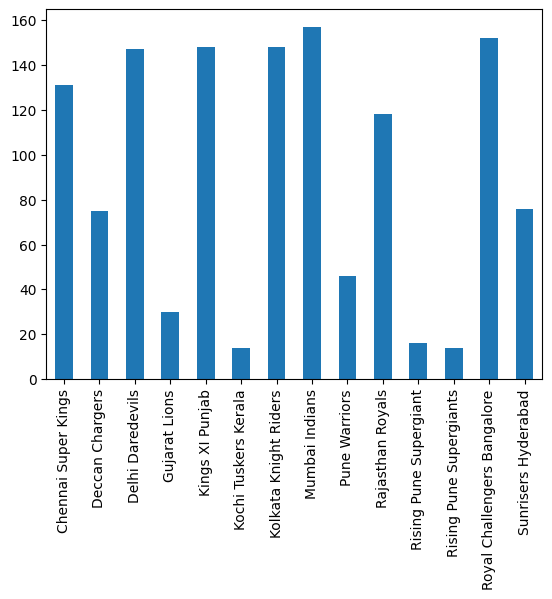

In [30]:

#plot bar graph for the teams and their number of matches played
(ipl['team2'].value_counts() + ipl['team1'].value_counts()).plot.bar()

In [39]:
# List out each seasons winners.

ipl[['season','winner']].drop_duplicates('season',keep='last').sort_values('season')

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


In [43]:
# how many times each team has won the finals

x = ipl.drop_duplicates('season',keep='last')

In [45]:
x['winner'].value_counts()

Mumbai Indians           3
Chennai Super Kings      2
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [46]:
# Find out whether the toss winner of the game has actually won the game by his decision to bat or field first?

ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [75]:
def win_bat(row):

  if row['toss_winner'] == row['winner']:
    if row['toss_decision']=='bat':
      return 'yes'
    else:
      return 'no'
  else:
    return 'not'
def win_field(row):

  if row['toss_winner'] == row['winner']:
    if row['toss_decision']=='field':
      return 'yes'
    else:
      return 'no'
  else:
    return 'not'

In [76]:
ipl['win_by_bat'] = ipl.apply(win_bat, axis=1)
ipl['win_by_field'] = ipl.apply(win_field, axis=1)

In [77]:
ipl.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by_decision,win_by_bat,win_by_field
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN,no,not,not
341,342,2012,Delhi,2012-04-27,Delhi Daredevils,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Daredevils,37,0,V Sehwag,Feroz Shah Kotla,Aleem Dar,BNJ Oxenford,NaN,no,not,not
424,425,2013,Chennai,2013-05-02,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,15,0,SK Raina,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN,yes,yes,no
523,524,2015,Mumbai,2015-04-12,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,18,0,GJ Bailey,Wankhede Stadium,AK Chaudhary,K Srinivasan,NaN,no,not,not
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN,yes,no,yes
493,494,2014,Ranchi,2014-05-13,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,5,RA Jadeja,JSCA International Stadium Complex,BNJ Oxenford,C Shamshuddin,NaN,no,not,not
90,91,2008,Chennai,2008-05-10,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling,NaN,no,not,not
347,348,2012,Cuttack,2012-05-01,Deccan Chargers,Pune Warriors,Deccan Chargers,bat,normal,0,Deccan Chargers,13,0,KC Sangakkara,Barabati Stadium,Aleem Dar,AK Chaudhary,NaN,yes,yes,no
371,372,2012,Delhi,2012-05-17,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Feroz Shah Kotla,HDPK Dharmasena,C Shamshuddin,NaN,no,not,not
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN,no,not,not


In [78]:
ipl['win_by_decision'].value_counts()

yes    325
no     311
Name: win_by_decision, dtype: int64

In [79]:
t =ipl.groupby(['season','toss_winner','win_by_bat'],sort=True)

In [82]:
t.size().head(25)

season  toss_winner            win_by_bat
2008    Chennai Super Kings    no            1
                               not           2
                               yes           2
        Deccan Chargers        no            2
                               not           7
                               yes           0
        Delhi Daredevils       no            2
                               not           4
                               yes           0
        Gujarat Lions          no            0
                               not           0
                               yes           0
        Kings XI Punjab        no            3
                               not           4
                               yes           1
        Kochi Tuskers Kerala   no            0
                               not           0
                               yes           0
        Kolkata Knight Riders  no            0
                               not           3
                  

In [65]:
ipl.groupby(['season','toss_winner','win_by_bat'])['win_by_bat'].count()

season  toss_winner                  win_by_bat
2008    Chennai Super Kings          no             3
                                     yes            2
        Deccan Chargers              no             9
                                     yes            0
        Delhi Daredevils             no             6
                                     yes            0
        Gujarat Lions                no             0
                                     yes            0
        Kings XI Punjab              no             7
                                     yes            1
        Kochi Tuskers Kerala         no             0
                                     yes            0
        Kolkata Knight Riders        no             3
                                     yes            3
        Mumbai Indians               no             8
                                     yes            0
        Pune Warriors                no             0
                                  

In [66]:
toss_data = ipl[['season','city','venue','toss_winner','toss_decision','winner']].copy()

In [67]:
toss_data['toss_with_bat']=""
toss_data['toss_with_field']=""

In [68]:
d1 = toss_data['toss_winner']==toss_data['winner']

In [69]:
toss_data = toss_data[d1].sort_values('toss_winner')

In [70]:
def findValues_for_bat(toss_decision):
    if toss_decision=='bat':
        return 'yes'
    else:
        return 'no'
def findValues_for_field(toss_decision):
    if toss_decision=='field':
        return 'yes'
    else:
        return 'no'

In [71]:
toss_data['toss_with_bat']=toss_data['toss_decision'].apply(findValues_for_bat)
toss_data['toss_with_field']=toss_data['toss_decision'].apply(findValues_for_field)

In [72]:
toss_data=toss_data.rename(columns={'toss_with_bat':'bat first','toss_with_field':'field first'})
toss_data.head(10)

,season,city,venue,toss_winner,toss_decision,winner,bat first,field first
520,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
181,2010,Kolkata,Eden Gardens,Chennai Super Kings,bat,Chennai Super Kings,yes,no
445,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
60,2008,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,yes,no
303,2011,Mumbai,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,no,yes
424,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
306,2011,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
421,2013,Pune,Subrata Roy Sahara Stadium,Chennai Super Kings,bat,Chennai Super Kings,yes,no
86,2008,Delhi,Feroz Shah Kotla,Chennai Super Kings,field,Chennai Super Kings,no,yes
541,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no


In [73]:
 t = toss_data.groupby(['season','toss_winner','bat first'],sort=True)['bat first'].count()
#t = toss_data.groupby(['season','toss_winner','toss_decision'],sort=True)

In [74]:
t

season  toss_winner                  bat first
2008    Chennai Super Kings          no           1
                                     yes          2
        Deccan Chargers              no           2
                                     yes          0
        Delhi Daredevils             no           2
                                     yes          0
        Gujarat Lions                no           0
                                     yes          0
        Kings XI Punjab              no           3
                                     yes          1
        Kochi Tuskers Kerala         no           0
                                     yes          0
        Kolkata Knight Riders        no           0
                                     yes          3
        Mumbai Indians               no           4
                                     yes          0
        Pune Warriors                no           0
                                     yes          0
        Rajasthan

In [83]:
t.describe()

id                                                             dl_applied                                                win_by_runs                                                             win_by_wickets                                                 umpire3                             
                                              count        mean        std    min     25%    50%     75%    max      count      mean       std  min   25%  50%   75%  max       count        mean        std    min     25%    50%     75%    max          count      mean       std  min   25%  50%   75%   max   count mean std min 25% 50% 75% max
season toss_winner                 win_by_bat                                                                                                                                                                                                                                                                                                        
2008   Chennai Super Kings         no           1.0   87.000000        NaN   87.0   87.00   87.0   87.00   87.0        1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0         1.0    0.000000        NaN    0.0    0.00    0.0    0.00    0.0            1.0  4.000000       NaN  4.0  4.00  4.0  4.00   4.0     0.0  NaN NaN NaN NaN NaN NaN NaN
                                   not          2.0   81.000000   2.828427   79.0   80.00   81.0   82.00   83.0        2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0         2.0    0.000000   0.000000    0.0    0.00    0.0    0.00    0.0            2.0  8.000000  0.000000  8.0  8.00  8.0  8.00   8.0     0.0  NaN NaN NaN NaN NaN NaN NaN
                                   yes          2.0   67.500000   9.192388   61.0   64.25   67.5   70.75   74.0        2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0         2.0   23.000000  14.142136   13.0   18.00   23.0   28.00   33.0            2.0  0.000000  0.000000  0.0  0.00  0.0  0.00   0.0     0.0  NaN NaN NaN NaN NaN NaN NaN
       Deccan Chargers             no           2.0   78.500000   9.192388   72.0   75.25   78.5   81.75   85.0        2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0         2.0    0.000000   0.000000    0.0    0.00    0.0    0.00    0.0            2.0  8.500000  2.121320  7.0  7.75  8.5  9.25  10.0     0.0  NaN NaN NaN NaN NaN NaN NaN
                                   not          7.0   90.714286  20.710016   64.0   73.00   98.0  106.50  114.0        7.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0         7.0    5.714286   9.569296    0.0    0.00    0.0    7.50   25.0            7.0  3.714286  3.728909  0.0  0.00  5.0  6.00   9.0     0.0  NaN NaN NaN NaN NaN NaN NaN
       Delhi Daredevils            no           2.0  106.500000   3.535534  104.0  105.25  106.5  107.75  109.0        2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0         2.0    0.000000   0.000000    0.0    0.00    0.0    0.00    0.0            2.0  5.000000  0.000000  5.0  5.00  5.0  5.00   5.0     0.0  NaN NaN NaN NaN NaN NaN NaN
                                   not          4.0   92.500000  18.734994   73.0   79.75   91.0  103.75  115.0        4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0         4.0   35.000000  48.311489    0.0    4.50   17.5   48.00  105.0            4.0  1.000000  2.000000  0.0  0.00  0.0  1.00   4.0     0.0  NaN NaN NaN NaN NaN NaN NaN
       Kings XI Punjab             no           3.0   89.666667  16.258331   77.0   80.50   84.0   96.00  108.0        3.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0         3.0    0.000000   0.000000    0.0    0.00    0.0    0.00    0.0            3.0  6.333333  0.577350  6.0  6.00  6.0  6.50   7.0     0.0  NaN NaN NaN NaN NaN NaN NaN
                                   not          4.0   96.000000  23.395156   65.0   84.50  101.5  113.00  116.0        4.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0         4.0    4.500000   9.000000    0.0    0.00    0.0    4.50   18.0            4.0  4.500000  3.872983  0.0  2.25

In [4]:
delivery = pd.read_csv('deliveries.csv')

In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [6]:
delivery.shape

(150460, 21)

In [7]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
# top 5 batsman in ipl according to most number of runs?

delivery.groupby('batsman')['batsman_runs'].sum().reset_index().sort_values('batsman_runs', ascending=False).head()

,batsman,batsman_runs
374,SK Raina,4548
431,V Kohli,4423
323,RG Sharma,4207
137,G Gambhir,4132
103,DA Warner,4014


In [10]:
# which batsman has played most number of balls

delivery.groupby(['batsman'])['batsman_runs'].count().sort_values(ascending=False).head(5)

batsman
V Kohli      3494
G Gambhir    3433
SK Raina     3369
RG Sharma    3274
S Dhawan     3005
Name: batsman_runs, dtype: int64

In [11]:
# which batsman has hit highest number of 4s

mask=delivery['batsman_runs']==4
delivery_fours = delivery[mask].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
delivery_fours.head(5)

batsman
G Gambhir    484
SK Raina     402
DA Warner    401
S Dhawan     401
V Kohli      384
Name: batsman_runs, dtype: int64

In [12]:
# how many total fours in ipl till now
len(delivery[mask])

17033

In [13]:
# which batsman has hit highest number of 6's

mask=delivery['batsman_runs']==6
delivery_fours = delivery[mask].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
delivery_fours.head(5)

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

In [14]:
# which bowler has given most no. of dot balls
mask = delivery['total_runs']==0
delivery_dot = delivery[mask]
delivery_dot.groupby('bowler')['total_runs'].count().sort_values(ascending=False).head(5)

bowler
P Kumar            1075
Harbhajan Singh    1062
SL Malinga         1060
DW Steyn            978
A Mishra            953
Name: total_runs, dtype: int64

In [17]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
# make a function with one argument:- batsman name and return the name of the team that batsman has hit most runs against

delivery.groupby(['bowling_team','batsman'])['batsman_runs'].sum().sort_values(ascending=False).head()


bowling_team           batsman  
Kings XI Punjab        CH Gayle     797
Kolkata Knight Riders  RG Sharma    710
Mumbai Indians         SK Raina     708
Chennai Super Kings    V Kohli      706
Kolkata Knight Riders  SK Raina     701
Name: batsman_runs, dtype: int64

In [22]:
# Finding virat has hit most runs against which team
mask=delivery['batsman']=='V Kohli'
bats = delivery[mask]
bats.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]

'Chennai Super Kings'

In [23]:
def opp_team_most_runs(batsman_name):
    mask=delivery['batsman']==batsman_name
    bats = delivery[mask]
    ans=bats.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]
    return ans

In [24]:
opp_team_most_runs('RG Sharma')

'Kolkata Knight Riders'

In [25]:
# make a function which takes one argument:- batsman and return which bowler has givn highest number of runs to that batsman
mask=delivery['batsman']=='V Kohli'
bats = delivery[mask]
bats.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False).head()

bowler
A Mishra     149
UT Yadav     141
DJ Bravo     130
R Ashwin     127
RA Jadeja    104
Name: batsman_runs, dtype: int64

In [26]:

def most_runs_taken_from_bowler(batsman_name):
    mask=delivery['batsman']==batsman_name
    bats = delivery[mask]
    return bats.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False).index[0]

In [27]:
most_runs_taken_from_bowler('V Kohli')

'A Mishra'

In [28]:
# in each over which team has hit how many sixes

# Pivot_table method
sixes = delivery[delivery['batsman_runs']==6]
y=sixes.pivot_table(index=['batting_team'],columns=['over'],values='batsman_runs',aggfunc='count')
print(y)

over                           1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20
batting_team                                                                                                                                       
Chennai Super Kings           5.0  17.0  37.0  34.0  41.0  43.0  22.0  25.0  23.0  23.0  36.0  36.0  35.0  45.0  43.0  46.0  51.0  58.0  54.0  68.0
Deccan Chargers               3.0  21.0  11.0  17.0  27.0  22.0  11.0  13.0  17.0  14.0  15.0  26.0  23.0  22.0  20.0  21.0  38.0  37.0  23.0  19.0
Delhi Daredevils             14.0  19.0  30.0  41.0  29.0  27.0  20.0  26.0  32.0  24.0  34.0  38.0  37.0  35.0  28.0  43.0  56.0  44.0  59.0  50.0
Gujarat Lions                 4.0   6.0  14.0   9.0  11.0  12.0  10.0   6.0  11.0   8.0   5.0   7.0   5.0   8.0   5.0   5.0   7.0   9.0   9.0   4.0
Kings XI Punjab              10.0  19.0  27.0  36.0  30.0  39.0  19.0  35.0  36.0  29.0  37.0  38.0  47.0  41.0 

In [29]:
# Groupby method
sixes.groupby(['batting_team','over'])['batsman_runs'].count().head(10)

batting_team         over
Chennai Super Kings  1        5
                     2       17
                     3       37
                     4       34
                     5       41
                     6       43
                     7       22
                     8       25
                     9       23
                     10      23
Name: batsman_runs, dtype: int64

In [30]:
import seaborn as sns

<Axes: xlabel='over', ylabel='batting_team'>

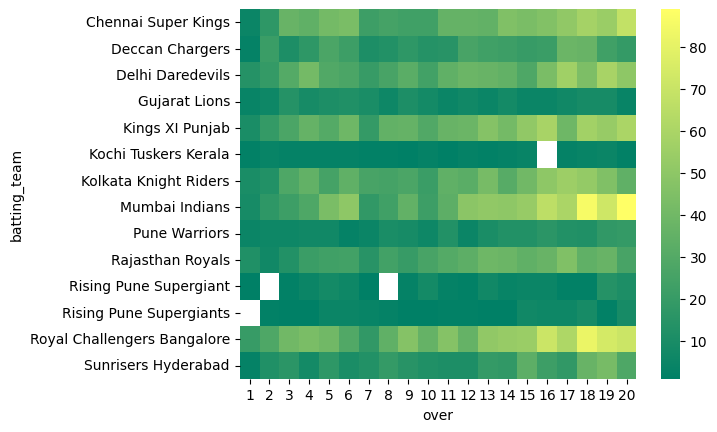

In [31]:
sns.heatmap(y,cmap='summer')

In [ ]:
# find the orange cap holders of each season

